<a href="https://colab.research.google.com/github/erlinares/datasets/blob/main/Sesion19RedesNeuronalesTensorBoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripción del problema

**Contexto**

El conjunto de datos original contiene 1000 registros con 20 atributos categoricos preparados por el Prof. Hofmann. 

En este conjunto de datos, cada registro representa a una persona que toma un crédito de un banco. 

Cada persona se clasifica en riesgo crediticio **bueno** o **malo**  según el conjunto de atributos. 

Enlace al conjunto de datos original en 

[UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data))



**Contenido**

Los atributos seleccionados:


* **Age** (numeric)
* **Sex** (text: male, female)
* **Job** (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* **Housing** (text: own, rent, or free)
* **Saving accounts** (text - little, moderate, quite rich, rich)
* **Checking account** (numeric, in DM - Deutsch Mark)
* **Credit amount** (numeric, in DM)
* **Duration** (numeric, in month)
* **Purpose**(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
* **Risk** (Value target - Good or Bad Risk)

**Objetivo**

Entrenar un modelo para predecir a partir de nuevos datos si una persona que solicita un crédito representa un riesgo bueno o malo

# Leer datos

In [5]:
# leer librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#leer conjunto de datos

dataset = pd.read_csv('german_credit_data.csv')

# Explorar los datos

In [7]:
# ver la dimension

dataset.shape

(1000, 11)

In [8]:
# ver info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   age               1000 non-null   int64 
 2   sex               1000 non-null   object
 3   job               1000 non-null   int64 
 4   housing           1000 non-null   object
 5   saving_accounts   817 non-null    object
 6   checking account  606 non-null    object
 7   credit amount     1000 non-null   int64 
 8   duration          1000 non-null   int64 
 9   purpose           1000 non-null   object
 10  risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [9]:
#descripcion

dataset.describe()

Unnamed: 0          age          job  credit amount     duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436    11.375469     0.653614    2822.736876    12.058814
min       0.000000    19.000000     0.000000     250.000000     4.000000
25%     249.750000    27.000000     2.000000    1365.500000    12.000000
50%     499.500000    33.000000     2.000000    2319.500000    18.000000
75%     749.250000    42.000000     2.000000    3972.250000    24.000000
max     999.000000    75.000000     3.000000   18424.000000    72.000000

In [10]:
# mostrar

dataset.head(5)

Unnamed: 0  age     sex  job housing saving_accounts checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   credit amount  duration              purpose  risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad

In [11]:
# ver valores unicos

dataset.nunique()

Unnamed: 0          1000
age                   53
sex                    2
job                    4
housing                3
saving_accounts        4
checking account       3
credit amount        921
duration              33
purpose                8
risk                   2
dtype: int64

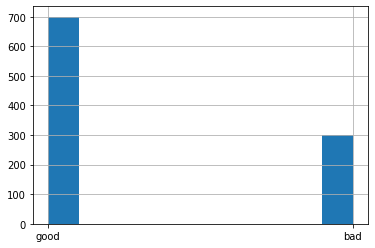

In [12]:
# histograma

dataset.risk.hist()

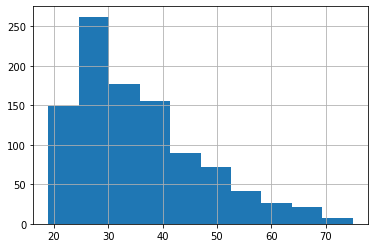

In [13]:
#histograma edad
dataset.age.hist()

# EDA Profiling

In [14]:
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.0 MB 262 kB/s
     |████████████████████████████████| 102 kB 7.2 MB/s 
     |████████████████████████████████| 696 kB 71.3 MB/s 
     |████████████████████████████████| 62 kB 1.9 MB/s 
     |████████████████████████████████| 9.9 MB 74.2 MB/s 
     |████████████████████████████████| 4.7 MB 69.8 MB/s 
     |████████████████████████████████| 296 kB 79.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=324949 sha256=c505f63572623edbb134f24099506e8a9b85e1d86d89673e7478ddc9bea09cf7
  Stored in directory: /tmp/pip-ephem-wheel-cache-67tamvce/wheels/8e/70/3e/0fedd1728e310b5af797b1c8a9ef27ebf4046917c84a2fe736
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=6582f270b0a6ffac1f3da99585830a76a5b9cedc1bee92448a6a9dd150a62034
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b

In [15]:
# instalar libreria

!pip install pandas-profiling==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 315 kB 29.4 MB/s 
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling dev
    Uninstalling pandas-profiling-dev:
      Successfully uninstalled pandas-profiling-dev


In [16]:
#import la libreria profiling
from pandas_profiling import ProfileReport

In [17]:
profile = ProfileReport(dataset, title='Pandas Report')

In [18]:
#mostrar el reporte
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
#mandar a un archivo
profile.to_file('edaCreditCard.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Analisis de la variable objetivo

In [20]:
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly

In [21]:
trace0 = go.Bar(
    x = dataset[dataset["risk"]== 'good']["housing"].value_counts().index.values,
    y = dataset[dataset["risk"]== 'good']["housing"].value_counts().values,
    name='Good credit'
)

trace1 = go.Bar(
    x = dataset[dataset["risk"]== 'bad']["housing"].value_counts().index.values,
    y = dataset[dataset["risk"]== 'bad']["housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribution'
)


fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   age               1000 non-null   int64 
 2   sex               1000 non-null   object
 3   job               1000 non-null   int64 
 4   housing           1000 non-null   object
 5   saving_accounts   817 non-null    object
 6   checking account  606 non-null    object
 7   credit amount     1000 non-null   int64 
 8   duration          1000 non-null   int64 
 9   purpose           1000 non-null   object
 10  risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [23]:
trace0 = go.Bar(
    x = dataset[dataset["risk"]== 'good']["sex"].value_counts().index.values,
    y = dataset[dataset["risk"]== 'good']["sex"].value_counts().values,
    name='Good credit'
)

trace1 = go.Bar(
    x = dataset[dataset["risk"]== 'bad']["sex"].value_counts().index.values,
    y = dataset[dataset["risk"]== 'bad']["sex"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='sex Distribution'
)


fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

In [24]:
trace0 = go.Bar(
    x = dataset[dataset["risk"]== 'good']["job"].value_counts().index.values,
    y = dataset[dataset["risk"]== 'good']["job"].value_counts().values,
    name='Good credit'
)

trace1 = go.Bar(
    x = dataset[dataset["risk"]== 'bad']["job"].value_counts().index.values,
    y = dataset[dataset["risk"]== 'bad']["job"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='job Distribution'
)


fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

In [25]:
trace0 = go.Bar(
    x = dataset[dataset["risk"]== 'good']["saving_accounts"].value_counts().index.values,
    y = dataset[dataset["risk"]== 'good']["saving_accounts"].value_counts().values,
    name='Good credit'
)

trace1 = go.Bar(
    x = dataset[dataset["risk"]== 'bad']["saving_accounts"].value_counts().index.values,
    y = dataset[dataset["risk"]== 'bad']["saving_accounts"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='saving_accounts Distribution'
)


fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

In [26]:
trace0 = go.Bar(
    x = dataset[dataset["risk"]== 'good']["purpose"].value_counts().index.values,
    y = dataset[dataset["risk"]== 'good']["purpose"].value_counts().values,
    name='Good credit'
)

trace1 = go.Bar(
    x = dataset[dataset["risk"]== 'bad']["purpose"].value_counts().index.values,
    y = dataset[dataset["risk"]== 'bad']["purpose"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='purpose Distribution'
)


fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

# Analisis variables objetivo con variables continuas

In [27]:
pd.crosstab(dataset.purpose, dataset.risk)

risk                 bad  good
purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
education             23    36
furniture/equipment   58   123
radio/TV              62   218
repairs                8    14
vacation/others        5     7

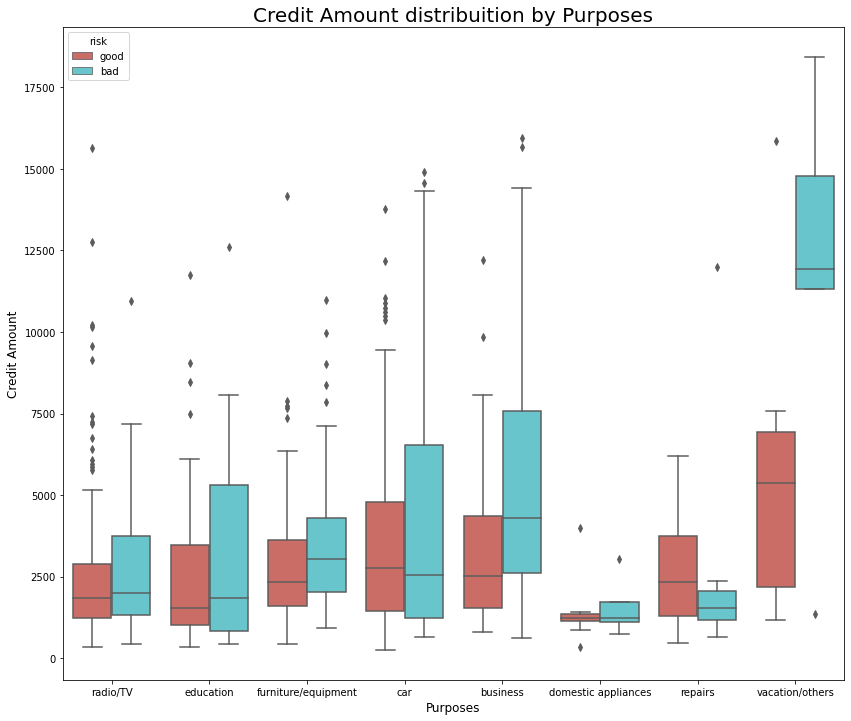

In [28]:
plt.figure(figsize = (14,12))

g2 = sns.boxplot(x="purpose", y="credit amount", data=dataset, 
               palette="hls", hue = "risk")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.show()

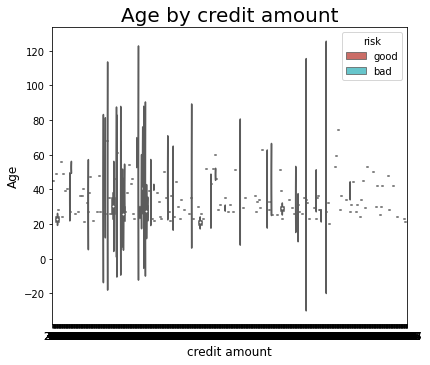

In [29]:
plt.figure(figsize = (14,12))

g1 = plt.subplot(222)
g1 = sns.violinplot(x="credit amount", y="age", data=dataset, palette="hls", hue = "risk",split=True)
g1.set_xlabel("credit amount", fontsize=12)
g1.set_ylabel("Age", fontsize=12)
g1.set_title("Age by credit amount", fontsize=20)

plt.show()

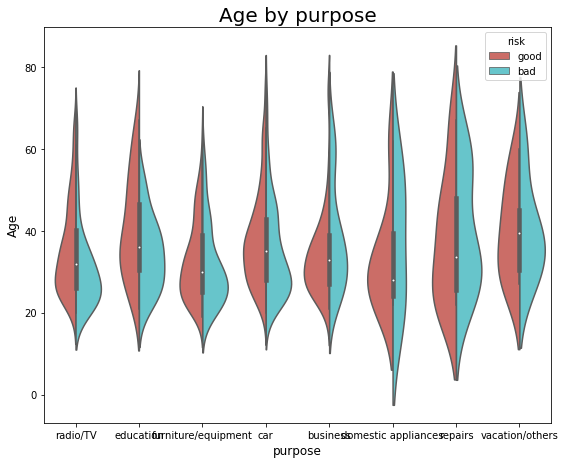

In [30]:
plt.figure(figsize = (20,16))

g1 = plt.subplot(222)
g1 = sns.violinplot(x="purpose", y="age", data=dataset, palette="hls", hue = "risk",split=True)
g1.set_xlabel("purpose", fontsize=12)
g1.set_ylabel("Age", fontsize=12)
g1.set_title("Age by purpose", fontsize=20)

plt.show()

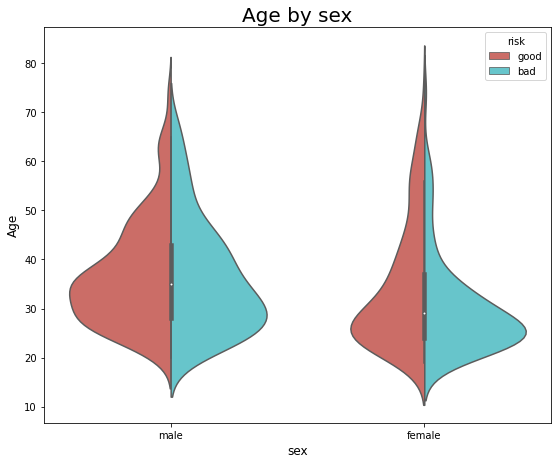

In [31]:
plt.figure(figsize = (20,16))

g1 = plt.subplot(222)
g1 = sns.violinplot(x="sex", y="age", data=dataset, palette="hls", hue = "risk",split=True)
g1.set_xlabel("sex", fontsize=12)
g1.set_ylabel("Age", fontsize=12)
g1.set_title("Age by sex", fontsize=20)

plt.show()

# Feature Engineering

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   age               1000 non-null   int64 
 2   sex               1000 non-null   object
 3   job               1000 non-null   int64 
 4   housing           1000 non-null   object
 5   saving_accounts   817 non-null    object
 6   checking account  606 non-null    object
 7   credit amount     1000 non-null   int64 
 8   duration          1000 non-null   int64 
 9   purpose           1000 non-null   object
 10  risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [33]:
interval = (18,25,35,60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
dataset['Age_cat'] = pd.cut(dataset.age, interval, labels=cats)

In [34]:
dataset.head(4)

Unnamed: 0  age     sex  job housing saving_accounts checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   

   credit amount  duration              purpose  risk  Age_cat  
0           1169         6             radio/TV  good   Senior  
1           5951        48             radio/TV   bad  Student  
2           2096        12            education  good    Adult  
3           7882        42  furniture/equipment  good    Adult

In [35]:
#revisar las variables categoricas con valores nulos
print("Sex : ",dataset.sex.unique())
print("Housing : ",dataset.housing.unique())
print("Saving accounts : ",dataset.saving_accounts.unique())
print("Checking account : ",dataset['checking account'].unique())
print("Purpose : ",dataset.purpose.unique())
print("Risk : ",dataset.risk.unique())
print("Aget_cat : ",dataset.Age_cat.unique())

Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account :  ['little' 'moderate' nan 'rich']
Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Risk :  ['good' 'bad']
Aget_cat :  ['Senior', 'Student', 'Adult', 'Young']
Categories (4, object): ['Student' < 'Young' < 'Adult' < 'Senior']


In [36]:
#crear una funcion para aplicar dummies 
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [37]:
#reemplazar los valores nan

dataset['saving_accounts'] = dataset['saving_accounts'].fillna('no_inf')
dataset['checking account'] = dataset['checking account'].fillna('no_inf')


In [38]:
dataset.head(5)

Unnamed: 0  age     sex  job housing saving_accounts checking account  \
0           0   67    male    2     own          no_inf           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little           no_inf   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   credit amount  duration              purpose  risk  Age_cat  
0           1169         6             radio/TV  good   Senior  
1           5951        48             radio/TV   bad  Student  
2           2096        12            education  good    Adult  
3           7882        42  furniture/equipment  good    Adult  
4           4870        24                  car   bad    Adult

In [39]:
#convertir a dummies las variables categoricas
dataset = dataset.merge(pd.get_dummies(dataset.purpose, drop_first=True, prefix='purpose'), left_index=True, right_index=True)
dataset

Unnamed: 0  age     sex  job housing saving_accounts checking account  \
0             0   67    male    2     own          no_inf           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little           no_inf   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
..          ...  ...     ...  ...     ...             ...              ...   
995         995   31  female    1     own          little           no_inf   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little           no_inf   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     credit amount  duration              purpose  risk  Age_cat  purpose_car  \
0             1169         6             radio/TV  good   Senior            0   
1             5951        48             radio/TV   bad  Student            0   
2             2096        12            education  good    Adult            0   
3             7882        42  furniture/equipment  good    Adult            0   
4             4870        24                  car   bad    Adult            1   
..             ...       ...                  ...   ...      ...          ...   
995           1736        12  furniture/equipment  good    Young            0   
996           3857        30                  car  good    Adult            1   
997            804        12             radio/TV  good    Adult            0   
998           1845        45             radio/TV   bad  Student            0   
999           4576        45                  car  good    Young            1   

     purpose_domestic appliances  purpose_education  \
0                              0                  0   
1                              0                  0   
2                              0                  1   
3                              0                  0   
4                              0                  0   
..                           ...                ...   
995                            0                  0   
996                            0                  0   
997                            0                  0   
998                            0                  0   
999                            0                  0   

     purpose_furniture/equipment  purpose_radio/TV  purpose_repairs  \
0                              0                 1                0   
1                              0                 1                0   
2                              0                 0                0   
3                              1                 0                0   
4                              0                 0                0   
..                           ...               ...              ...   
995                            1                 0                0   
996                            0                 0                0   
997                            0                 1                0   
998                            0                 1                0   
999                            0                 0                0   

     purpose_vacation/others  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
..                       ...  
995                        0  
996                        0  
997                        0  
998                        0  
999                        0  

[1000 rows x 19 columns]

In [40]:
#dataset = dataset.merge(pd.get_dummies(dataset.purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)

dataset = dataset.merge(pd.get_dummies(dataset.sex, prefix='Sex'), left_index=True, right_index=True)

#dataset = dataset.merge(pd.get_dummies(dataset.sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)

dataset = dataset.merge(pd.get_dummies(dataset.housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)

dataset = dataset.merge(pd.get_dummies(dataset["saving_accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)

dataset = dataset.merge(pd.get_dummies(dataset.risk, prefix='Risk'), left_index=True, right_index=True)

dataset = dataset.merge(pd.get_dummies(dataset["checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)

#dataset = dataset.merge(pd.get_dummies(dataset["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

dataset = dataset.merge(pd.get_dummies(dataset["Age_cat"], prefix='Age_cat'), left_index=True, right_index=True)

dataset

Unnamed: 0  age     sex  job housing saving_accounts checking account  \
0             0   67    male    2     own          no_inf           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little           no_inf   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
..          ...  ...     ...  ...     ...             ...              ...   
995         995   31  female    1     own          little           no_inf   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little           no_inf   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     credit amount  duration              purpose  ... Savings_rich Risk_bad  \
0             1169         6             radio/TV  ...            0        0   
1             5951        48             radio/TV  ...            0        1   
2             2096        12            education  ...            0        0   
3             7882        42  furniture/equipment  ...            0        0   
4             4870        24                  car  ...            0        1   
..             ...       ...                  ...  ...          ...      ...   
995           1736        12  furniture/equipment  ...            0        0   
996           3857        30                  car  ...            0        0   
997            804        12             radio/TV  ...            0        0   
998           1845        45             radio/TV  ...            0        1   
999           4576        45                  car  ...            0        0   

     Risk_good  Check_moderate  Check_no_inf  Check_rich  Age_cat_Student  \
0            1               0             0           0                0   
1            0               1             0           0                1   
2            1               0             1           0                0   
3            1               0             0           0                0   
4            0               0             0           0                0   
..         ...             ...           ...         ...              ...   
995          1               0             1           0                0   
996          1               0             0           0                0   
997          1               0             1           0                0   
998          0               0             0           0                1   
999          1               1             0           0                0   

     Age_cat_Young  Age_cat_Adult  Age_cat_Senior  
0                0              0               1  
1                0              0               0  
2                0              1               0  
3                0              1               0  
4                0              1               0  
..             ...            ...             ...  
995              1              0               0  
996              0              1               0  
997              0              1               0  
998              0              0               0  
999              1              0               0  

[1000 rows x 36 columns]

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Unnamed: 0                   1000 non-null   int64   
 1   age                          1000 non-null   int64   
 2   sex                          1000 non-null   object  
 3   job                          1000 non-null   int64   
 4   housing                      1000 non-null   object  
 5   saving_accounts              1000 non-null   object  
 6   checking account             1000 non-null   object  
 7   credit amount                1000 non-null   int64   
 8   duration                     1000 non-null   int64   
 9   purpose                      1000 non-null   object  
 10  risk                         1000 non-null   object  
 11  Age_cat                      1000 non-null   category
 12  purpose_car                  1000 non-null   uint8   
 13  purp

In [42]:
#eliminar las variables anteriores

del dataset["Unnamed: 0"]
del dataset["saving_accounts"]
del dataset["checking account"]
del dataset["purpose"]
del dataset["sex"]
del dataset["housing"]
del dataset["Age_cat"]
del dataset["risk"]
del dataset["Risk_good"]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          1000 non-null   int64
 1   job                          1000 non-null   int64
 2   credit amount                1000 non-null   int64
 3   duration                     1000 non-null   int64
 4   purpose_car                  1000 non-null   uint8
 5   purpose_domestic appliances  1000 non-null   uint8
 6   purpose_education            1000 non-null   uint8
 7   purpose_furniture/equipment  1000 non-null   uint8
 8   purpose_radio/TV             1000 non-null   uint8
 9   purpose_repairs              1000 non-null   uint8
 10  purpose_vacation/others      1000 non-null   uint8
 11  Sex_female                   1000 non-null   uint8
 12  Sex_male                     1000 non-null   uint8
 13  Housing_own                  1000 non-null   uint

# Correlacion

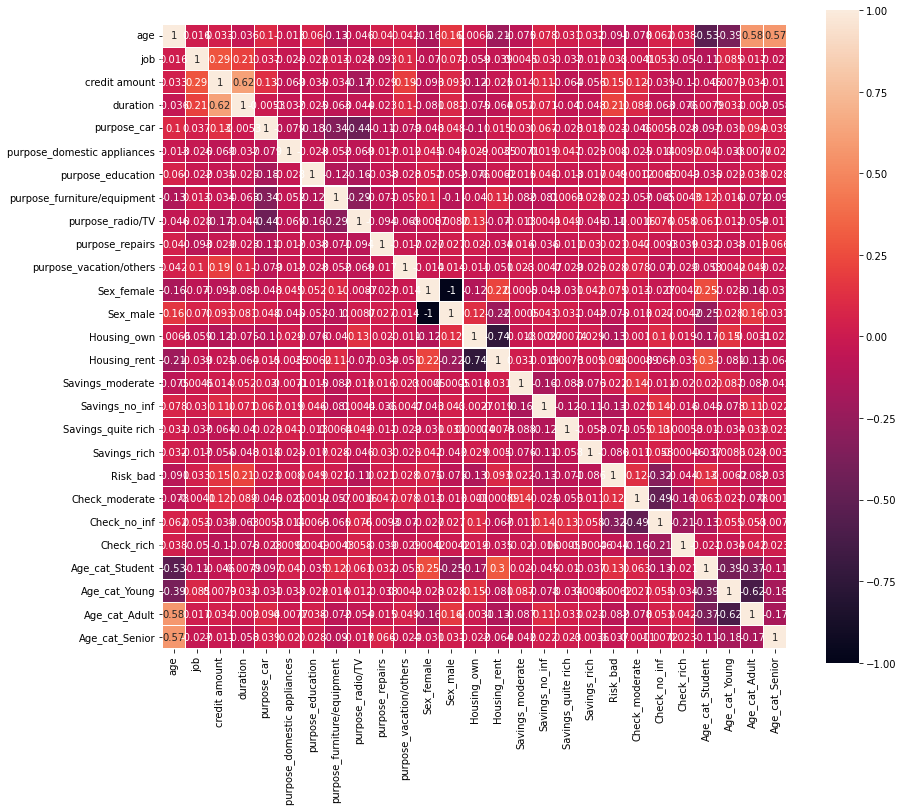

In [43]:
plt.figure(figsize=(14,12))
sns.heatmap(dataset.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

# Procesamiento de los datos

In [44]:
# importar librerias
from sklearn.model_selection import train_test_split


In [45]:
dataset['credit amount'].head()

0    1169
1    5951
2    2096
3    7882
4    4870
Name: credit amount, dtype: int64

In [46]:
dataset.head()

age  job  credit amount  duration  purpose_car  \
0   67    2           1169         6            0   
1   22    2           5951        48            0   
2   49    1           2096        12            0   
3   45    2           7882        42            0   
4   53    2           4870        24            1   

   purpose_domestic appliances  purpose_education  \
0                            0                  0   
1                            0                  0   
2                            0                  1   
3                            0                  0   
4                            0                  0   

   purpose_furniture/equipment  purpose_radio/TV  purpose_repairs  ...  \
0                            0                 1                0  ...   
1                            0                 1                0  ...   
2                            0                 0                0  ...   
3                            1                 0                0  ...   
4                            0                 0                0  ...   

   Savings_quite rich  Savings_rich  Risk_bad  Check_moderate  Check_no_inf  \
0                   0             0         0               0             0   
1                   0             0         1               1             0   
2                   0             0         0               0             1   
3                   0             0         0               0             0   
4                   0             0         1               0             0   

   Check_rich  Age_cat_Student  Age_cat_Young  Age_cat_Adult  Age_cat_Senior  
0           0                0              0              0               1  
1           0                1              0              0               0  
2           0                0              0              1               0  
3           0                0              0              1               0  
4           0                0              0              1               0  

[5 rows x 27 columns]

In [47]:
#aplicamos una funcion logaritmo para ajustar los valores
dataset['credit amount'] = np.log(dataset['credit amount'])

In [48]:
dataset.head(5)

age  job  credit amount  duration  purpose_car  \
0   67    2       7.063904         6            0   
1   22    2       8.691315        48            0   
2   49    1       7.647786        12            0   
3   45    2       8.972337        42            0   
4   53    2       8.490849        24            1   

   purpose_domestic appliances  purpose_education  \
0                            0                  0   
1                            0                  0   
2                            0                  1   
3                            0                  0   
4                            0                  0   

   purpose_furniture/equipment  purpose_radio/TV  purpose_repairs  ...  \
0                            0                 1                0  ...   
1                            0                 1                0  ...   
2                            0                 0                0  ...   
3                            1                 0                0  ...   
4                            0                 0                0  ...   

   Savings_quite rich  Savings_rich  Risk_bad  Check_moderate  Check_no_inf  \
0                   0             0         0               0             0   
1                   0             0         1               1             0   
2                   0             0         0               0             1   
3                   0             0         0               0             0   
4                   0             0         1               0             0   

   Check_rich  Age_cat_Student  Age_cat_Young  Age_cat_Adult  Age_cat_Senior  
0           0                0              0              0               1  
1           0                1              0              0               0  
2           0                0              0              1               0  
3           0                0              0              1               0  
4           0                0              0              1               0  

[5 rows x 27 columns]

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          1000 non-null   int64  
 1   job                          1000 non-null   int64  
 2   credit amount                1000 non-null   float64
 3   duration                     1000 non-null   int64  
 4   purpose_car                  1000 non-null   uint8  
 5   purpose_domestic appliances  1000 non-null   uint8  
 6   purpose_education            1000 non-null   uint8  
 7   purpose_furniture/equipment  1000 non-null   uint8  
 8   purpose_radio/TV             1000 non-null   uint8  
 9   purpose_repairs              1000 non-null   uint8  
 10  purpose_vacation/others      1000 non-null   uint8  
 11  Sex_female                   1000 non-null   uint8  
 12  Sex_male                     1000 non-null   uint8  
 13  Housing_own        

In [50]:
# separamos la variable objetivo (y) de las variables predictoras (X)
#Creating the X and y variables
X = dataset.drop('Risk_bad', 1).values
y = dataset['Risk_bad'].values

<ipython-input-50-6a0f5b4269db>:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [51]:
X[0]

array([67.        ,  2.        ,  7.06390396,  6.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ])

In [52]:
y[0:5]

array([0, 1, 0, 0, 1], dtype=uint8)

In [53]:
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [54]:
X_train[0]

array([60.        ,  2.        ,  7.61677581, 24.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ])

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          1000 non-null   int64  
 1   job                          1000 non-null   int64  
 2   credit amount                1000 non-null   float64
 3   duration                     1000 non-null   int64  
 4   purpose_car                  1000 non-null   uint8  
 5   purpose_domestic appliances  1000 non-null   uint8  
 6   purpose_education            1000 non-null   uint8  
 7   purpose_furniture/equipment  1000 non-null   uint8  
 8   purpose_radio/TV             1000 non-null   uint8  
 9   purpose_repairs              1000 non-null   uint8  
 10  purpose_vacation/others      1000 non-null   uint8  
 11  Sex_female                   1000 non-null   uint8  
 12  Sex_male                     1000 non-null   uint8  
 13  Housing_own        

In [56]:
print('X_train.shape',X_train.shape) 
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train.shape (700, 26)
X_test (300, 26)
y_train (700,)
y_test (300,)


# Modelado

Crear diferentes modelos para predecir el resultado positivo o negativo de un crédito, usando los siguientes métodos:

* Logistic Regression
* Linear Discriminant Analysis
* KNeighbors Classifier
* Decision Tree Classifier
* Gaussian NB
* Random Forest Classifier
* SVC
* XGB Classifier
* LGBM Classifier

In [57]:
#importar las librerias con cada algoritmo 

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [58]:
# Prepapar los modelos

#arreglo para almacenar los modelos
models = []
#agregamos cada uno de los métodos
models.append(('LGR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGBM', XGBClassifier()))
models.append(('LGBM', LGBMClassifier()))

In [59]:
# Entrenamos y validamos cada modelo

from sklearn.model_selection import KFold,cross_val_score

# arreglo para analizar los resultados
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=None)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

LGR: 0.363192 (0.107294)
LDA: 0.376881 (0.097415)
KNN: 0.249147 (0.100666)
CART: 0.414136 (0.113279)
NB: 0.625828 (0.078812)
RF: 0.338579 (0.077802)
SVM: 0.146766 (0.076273)
XGBM: 0.354959 (0.081730)
LGBM: 0.453013 (0.130951)


# Interpretacion de los resultados

In [60]:
resultsDF = pd.DataFrame (results, columns = ['V0','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9'])
resultsBox = pd.DataFrame (results, columns = ['V0','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9'])
resultsDF['Model'] = names
resultsDF

V0        V1        V2        V3        V4        V5    V6        V7  \
0  0.45  0.333333  0.434783  0.222222  0.409091  0.388889  0.20  0.352941   
1  0.45  0.333333  0.478261  0.259259  0.318182  0.388889  0.25  0.411765   
2  0.40  0.066667  0.173913  0.148148  0.227273  0.222222  0.30  0.235294   
3  0.60  0.266667  0.347826  0.407407  0.590909  0.444444  0.25  0.411765   
4  0.70  0.533333  0.608696  0.703704  0.681818  0.666667  0.60  0.588235   
5  0.40  0.266667  0.217391  0.296296  0.409091  0.500000  0.35  0.352941   
6  0.10  0.133333  0.086957  0.037037  0.181818  0.166667  0.25  0.235294   
7  0.45  0.266667  0.347826  0.296296  0.363636  0.444444  0.40  0.235294   
8  0.55  0.266667  0.347826  0.222222  0.454545  0.611111  0.40  0.529412   

         V8        V9 Model  
0  0.571429  0.269231   LGR  
1  0.571429  0.307692   LDA  
2  0.333333  0.384615   KNN  
3  0.476190  0.346154  CART  
4  0.714286  0.461538    NB  
5  0.285714  0.307692    RF  
6  0.238095  0.038462   SVM  
7  0.476190  0.269231  XGBM  
8  0.571429  0.576923  LGBM

In [61]:
resultsDF.mean(axis=1)

<ipython-input-61-c27f587f876a>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



0    0.363192
1    0.376881
2    0.249147
3    0.414136
4    0.625828
5    0.338579
6    0.146766
7    0.354959
8    0.453013
dtype: float64

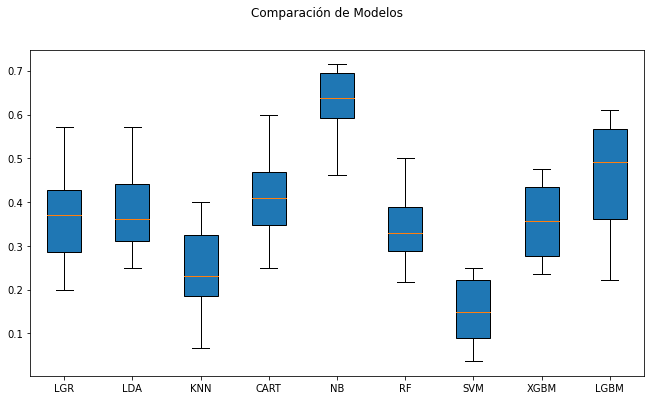

In [62]:
#Graficar

fig = plt.figure(figsize=(11,6))
fig.suptitle('Comparación de Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results,patch_artist=True)
ax.set_xticklabels(names)
plt.show()

In [63]:
import plotly.graph_objects as go

fig = go.Figure()
for i in range(9):
  fig.add_trace(go.Box(y=resultsBox[i:i+1].to_numpy()[0], name=names[i] ))
fig.show(renderer="colab")


In [64]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [00:02<00:00, 12.43it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.76               0.68     0.68      0.75   
LinearSVC                          0.75               0.65     0.65      0.73   
SGDClassifier                      0.70               0.65     0.65      0.70   
LinearDiscriminantAnalysis         0.74               0.65     0.65      0.72   
LogisticRegression                 0.74               0.64     0.64      0.72   
RidgeClassifierCV                  0.74               0.64     0.64      0.72   
RidgeClassifier                    0.74               0.64     0.64      0.72   
NearestCentroid                    0.64               0.63     0.63      0.65   
Perceptron                         0.67               0.62     0.62      0.67   
QuadraticDiscriminantAnalysis      0.59               0.61     0.61      0.60   
XGBClassifier               

In [66]:
predictions

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.76               0.68     0.68      0.75   
LinearSVC                          0.75               0.65     0.65      0.73   
SGDClassifier                      0.70               0.65     0.65      0.70   
LinearDiscriminantAnalysis         0.74               0.65     0.65      0.72   
LogisticRegression                 0.74               0.64     0.64      0.72   
RidgeClassifierCV                  0.74               0.64     0.64      0.72   
RidgeClassifier                    0.74               0.64     0.64      0.72   
NearestCentroid                    0.64               0.63     0.63      0.65   
Perceptron                         0.67               0.62     0.62      0.67   
QuadraticDiscriminantAnalysis      0.59               0.61     0.61      0.60   
XGBClassifier                      0.73               0.61     0.61      0.70   
GaussianNB                         0.63               0.60     0.60      0.64   
CalibratedClassifierCV             0.73               0.60     0.60      0.69   
BernoulliNB                        0.69               0.60     0.60      0.68   
NuSVC                              0.71               0.60     0.60      0.68   
SVC                                0.73               0.60     0.60      0.69   
PassiveAggressiveClassifier        0.62               0.59     0.59      0.63   
KNeighborsClassifier               0.69               0.58     0.58      0.67   
ExtraTreesClassifier               0.68               0.58     0.58      0.67   
RandomForestClassifier             0.70               0.58     0.58      0.67   
DecisionTreeClassifier             0.64               0.58     0.58      0.64   
AdaBoostClassifier                 0.69               0.58     0.58      0.66   
BaggingClassifier                  0.69               0.58     0.58      0.66   
LabelSpreading                     0.64               0.57     0.57      0.64   
LabelPropagation                   0.64               0.57     0.57      0.64   
ExtraTreeClassifier                0.61               0.55     0.55      0.62   
DummyClassifier                    0.70               0.50     0.50      0.57   

                               Time Taken  
Model                                      
LGBMClassifier                       0.07  
LinearSVC                            0.15  
SGDClassifier                        0.05  
LinearDiscriminantAnalysis           0.03  
LogisticRegression                   0.02  
RidgeClassifierCV                    0.03  
RidgeClassifier                      0.02  
NearestCentroid                      0.01  
Perceptron                           0.01  
QuadraticDiscriminantAnalysis        0.03  
XGBClassifier                        0.07  
GaussianNB                           0.02  
CalibratedClassifierCV               0.46  
BernoulliNB                          0.02  
NuSVC                                0.07  
SVC                                  0.09  
PassiveAggressiveClassifier          0.02  
KNeighborsClassifier                 0.05  
ExtraTreesClassifier                 0.38  
RandomForestClassifier               0.24  
DecisionTreeClassifier               0.05  
AdaBoostClassifier                   0.21  
BaggingClassifier                    0.06  
LabelSpreading                       0.04  
LabelPropagation                     0.05  
ExtraTreeClassifier                  0.03  
DummyClassifier                      0.03

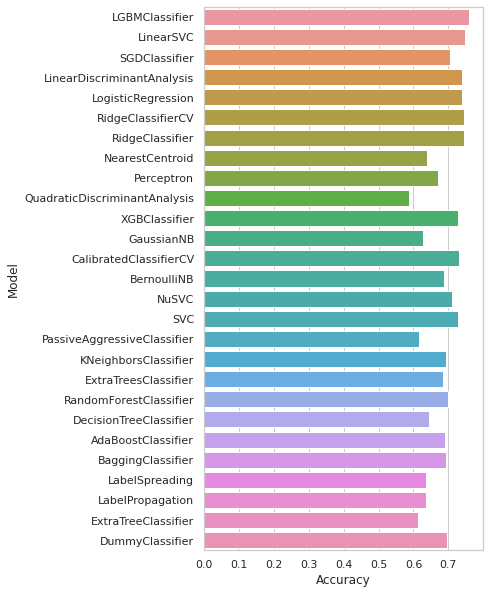

In [67]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Accuracy", data=predictions, orient=None)


In [68]:
import plotly.express as px

fig = px.bar(predictions)
fig.show(renderer="colab")

# Red Neuronal


In [69]:
#importar librerias
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
#Convertir  Numpy Array a Torch Tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Crear Red Neural para clasificacion

In [71]:
# Definir la clase Net
class Net(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(Net,self).__init__()
        self.input_layer    = nn.Linear(input_dim,128)
        self.hidden_layer1  = nn.Linear(128,64)
        self.output_layer   = nn.Linear(64,output_dim)
        self.relu = nn.ReLU()
    
    
    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.output_layer(out)
        return out

# Parametros

In [72]:
# input_dim = X_train.size()[1] porque regresa el tamaño de las variables de entrada
# output_dim = torch.unique(y_train).size()[0] porque tenemos 2 posibles tipos de valores: 0,1
input_dim  = X_train.size()[1]
output_dim = torch.unique(y_train).size()[0]
#crear modelo
model = Net(input_dim,output_dim)

In [87]:
print(input_dim)
print(output_dim)


26
2


# OPtimizador

In [73]:
# optimizador y funcion de perdida
learning_rate = 0.01
# funcion de perdida
criterion = nn.CrossEntropyLoss()
#optimizador
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
numpy.random.seed(7)

# Entrenar modelo

In [74]:
#definir una clase
def train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        #borrar los gradientes del último paso loss.backward()
        optimizer.zero_grad()
        
        #Paso adelante
        output_train = model(X_train)

        #calcula la perdida
        loss_train = criterion(output_train, y_train)

        #backward propagation: calcula gradientes
        loss_train.backward()

        #actualiza los pesos
        optimizer.step()
        
        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [75]:
#definir el nùmero de epocas y generar los arreglos para almacenar las perdidas
num_epochs = 50
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [76]:
#entrenar red
train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses)

Epoch 5/50, Train Loss: 0.5897, Test Loss: 0.6920
Epoch 10/50, Train Loss: 0.5990, Test Loss: 0.6585
Epoch 15/50, Train Loss: 0.5829, Test Loss: 0.6092
Epoch 20/50, Train Loss: 0.5858, Test Loss: 0.6074
Epoch 25/50, Train Loss: 0.5755, Test Loss: 0.6153
Epoch 30/50, Train Loss: 0.5697, Test Loss: 0.6067
Epoch 35/50, Train Loss: 0.5660, Test Loss: 0.6043
Epoch 40/50, Train Loss: 0.5614, Test Loss: 0.6018
Epoch 45/50, Train Loss: 0.5558, Test Loss: 0.5955
Epoch 50/50, Train Loss: 0.5487, Test Loss: 0.5875


# Función de pérdida

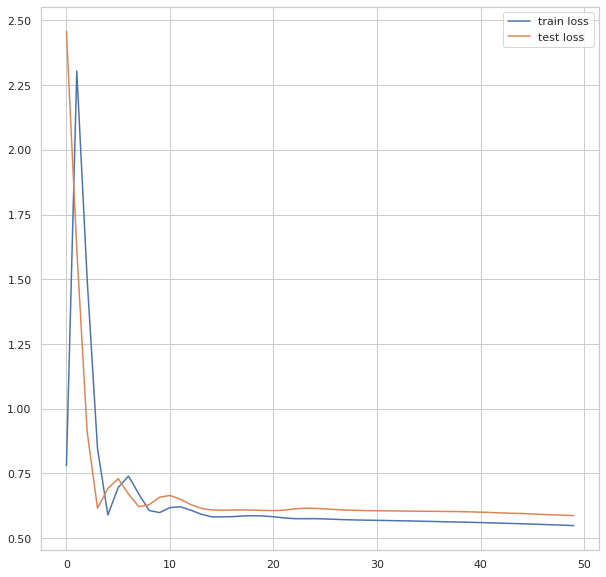

In [77]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

# Predicciones

In [78]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    # obtendremos algo como esto en pred_arr [32.1680,12.9350,-58.4877]
    # entonces tomaremos el índice de ese argumento que tiene el valor más alto aquí 32.1680 que corresponde al índice 0
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #aquí estamos haciendo una comparación simple entre predicted_arr y original_arr para obtener la precisión final
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [79]:
train_acc = get_accuracy_multiclass(predictions_train,y_train)
test_acc  = get_accuracy_multiclass(predictions_test,y_test)
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 73.286
Test Accuracy: 70.667


# Red Neuronal en TensorFlow

In [80]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [81]:
y_test_categorical = to_categorical(y_test, num_classes=2, dtype='float32')
y_train_categorical = to_categorical( y_train, num_classes=2, dtype='float32')

In [131]:
#definimos el modelo
def nn_model(learning_rate):
    NN_model = Sequential()

    # The Input Layer :
    NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

    # The Hidden Layers :
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

    # The Output Layer :
    NN_model.add(Dense(np.unique(y_train_categorical).shape[0] , kernel_initializer='normal',activation='sigmoid'))

    # Compile the network :
    optimizer = Adam(learning_rate=1e-5)
    NN_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['acc'])
    NN_model.summary()
    return NN_model

In [122]:
#convertir tensor a numpy
X_train = np.array(X_train)

In [123]:
numpy.random.seed(7)

In [133]:
import time
start_time = time.time()

NN_model = nn_model(1e-4)
nb_epochs =1600
NN_model.fit(X_train, y_train_categorical, epochs=nb_epochs, batch_size=512)
print("--- %s seconds ---" % (time.time() - start_time))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               3456      
                                                                 
 dense_14 (Dense)            (None, 256)               33024     
                                                                 
 dense_15 (Dense)            (None, 256)               65792     
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 dense_17 (Dense)            (None, 2)                 514       
                                                                 
Total params: 168,578
Trainable params: 168,578
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1600
2/2 [==============================

In [91]:
#convertir tensor en numpy array
X_test = np.array(X_test)

In [92]:
NNpredictions = NN_model.predict(X_test)

NN_prediction = list()
for i in range(len(NNpredictions)):
    NN_prediction.append(np.argmax(NNpredictions[i]))

10/10 [==============================] - 0s 4ms/step


In [139]:
NNpredictions[0:5]

array([[0.6473245 , 0.3548929 ],
       [0.6949096 , 0.303846  ],
       [0.646979  , 0.35169524],
       [0.697201  , 0.30490094],
       [0.7304755 , 0.26361904]], dtype=float32)

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, fbeta_score, classification_report

In [103]:
# Validation of the results
print(accuracy_score(y_test, NN_prediction))
print("\n")
print(confusion_matrix(y_test, NN_prediction))
print("\n")
print(fbeta_score(y_test, NN_prediction, beta=2))
print("\n")
print(classification_report(y_test, NN_prediction))

0.7166666666666667


[[190  19]
 [ 66  25]]


0.30637254901960786


              precision    recall  f1-score   support

           0       0.74      0.91      0.82       209
           1       0.57      0.27      0.37        91

    accuracy                           0.72       300
   macro avg       0.66      0.59      0.59       300
weighted avg       0.69      0.72      0.68       300



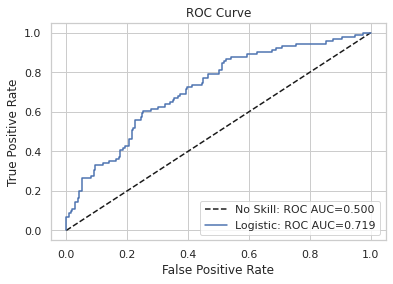

In [104]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, NNpredictions[:, 1])

lr_auc = roc_auc_score(y_test, NNpredictions[:, 1])

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='No Skill: ROC AUC=%.3f' % (0.5))
plt.plot(fpr, tpr, label='Logistic: ROC AUC=%.3f' % (lr_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()